In [1]:
import os 
import cv2
import matplotlib.pyplot as plt

root_path = os.getcwd()
input_path = os.path.join(root_path,"image.png")
input_img = cv2.imread(input_path)
# plt.imshow(input_img)

In [9]:
img = input_img.copy()

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# plt.imshow(gray_img)
blurred_img = cv2.GaussianBlur(gray_img, (5,5), 0)
# plt.imshow(blurred_img)
thresholding_img = cv2.threshold(blurred_img, 200, 255, cv2.THRESH_BINARY)[1]
# plt.imshow(thresholding_img)
filter_img = cv2.bilateralFilter(thresholding_img, 1, 100, 150)
canny_edges = cv2.Canny(filter_img, 20, 200)
# plt.imshow(canny_edges)


[np.int32(16), np.int32(20), np.int32(671), np.int32(666)]
[np.int32(124), np.int32(273), np.int32(271), np.int32(117)]


True

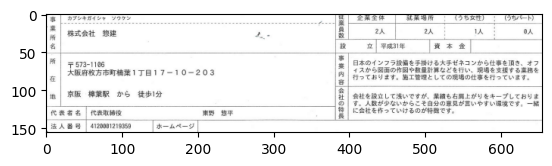

In [22]:
rect_list = []
count = 0

contours, hierarchy = cv2.findContours(canny_edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    contour_area = cv2.contourArea(contour)
    if contour_area > 4600:
        # print(contour_area)
        peri = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.02*peri, True)
        cv2.drawContours(img, [approx], -1, (0, 255, 0), 3)
        count = count + 1
        rect_list.append(approx)
# plt.imshow(img)
# print(rect_list)

i = 2
x_indexs = [rect_list[i][0][0][0], rect_list[i][1][0][0], rect_list[i][2][0][0], rect_list[i][3][0][0]]
y_indexs = [rect_list[i][0][0][1], rect_list[i][1][0][1], rect_list[i][2][0][1], rect_list[i][3][0][1]]
print(x_indexs)
print(y_indexs)

import numpy as np
x1 = np.min(x_indexs)
x2 = np.max(x_indexs)

y1 = np.min(y_indexs)
y2 = np.max(y_indexs)

to_crop_img = input_img.copy()
cropped_img = to_crop_img[y1:y2, x1:x2, :]
plt.imshow(cropped_img)
cv2.imwrite("result_img.png", cropped_img)
